In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [79]:
with open("bios_base_model_samples_factscore.json", "rb") as f:
    bios_factscore = json.load(f)

In [80]:
num_correct_all = []
num_false_all = []

for decision in bios_factscore["decisions"]:
    num_correct = 0
    num_false = 0
    if decision:
        for atom in decision:
            if atom["is_supported"]:
                num_correct+=1
            else:
                num_false+=1
    num_correct_all.append(num_correct)
    num_false_all.append(num_false)
    

In [81]:
num_correct_all = np.array(num_correct_all)
num_false_all = np.array(num_false_all)

num_correct_all = [num_correct_all[:len(num_correct_all)//2], num_correct_all[len(num_correct_all)//2:]]
num_false_all = [num_false_all[:len(num_false_all)//2], num_false_all[len(num_false_all)//2:]]

In [82]:
num_correct_all = np.array(num_correct_all)
num_false_all = np.array(num_false_all)



In [83]:
num_total_all = num_correct_all + num_false_all

In [84]:
num_correct_all.mean(axis=0)

array([1.5, 0.5, 0. , ..., 1.5, 1. , 0. ])

(array([1.609e+03, 1.515e+03, 1.301e+03, 2.670e+02, 8.300e+01, 1.200e+01,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 ]),
 <BarContainer object of 10 artists>)

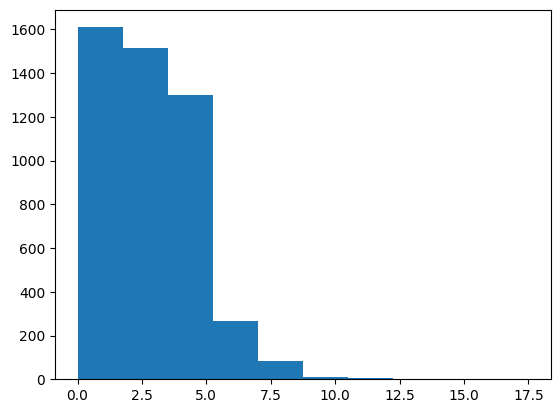

In [72]:
plt.hist(num_correct_all.mean(axis=0))

In [85]:
num_pretrain_entities = np.load("num_pretrain_entities/bios_test_points_medium.npy")


/tmp/ipykernel_7062/1007032735.py:1: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(num_pretrain_entities), num_false_all.mean(axis=0), alpha=0.05)


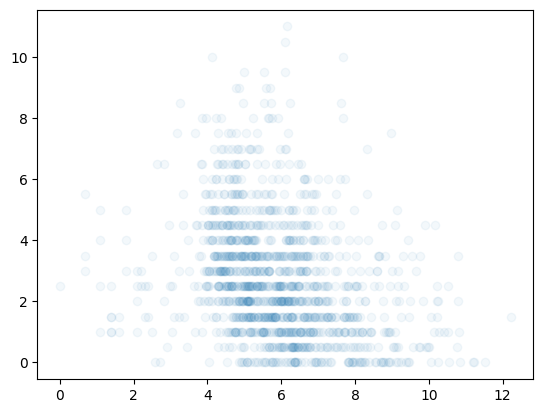

In [86]:
plt.scatter(np.log(num_pretrain_entities), num_false_all.mean(axis=0), alpha=0.05)

In [3]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

In [4]:
def find_similar_words(model, input_word):
    # Load the pre-trained Word2Vec model from gensim-data

    # Find similar words
    similar_words = model.most_similar(input_word)

    return similar_words

In [6]:
find_similar_words(model, "chicago")

[('baltimore', 0.673968493938446),
 ('denver', 0.6504617929458618),
 ('nyc', 0.6503334045410156),
 ('atlanta', 0.6398792266845703),
 ('springfield', 0.6387639045715332),
 ('los_angeles', 0.6372748613357544),
 ('oakland', 0.6330323815345764),
 ('seattle', 0.6305170059204102),
 ('illinois', 0.6295732855796814),
 ('dallas', 0.6279124021530151)]

In [ ]:
gpt2_triviaqa_test_answers_all5[17927]

array(['delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware'],
      dtype='<U399')

In [5]:
gpt2_triviaqa_train_answers_all30 = np.load("gpt2_triviaqa_train_answers_all30.npy")
gpt2_triviaqa_train_answer_types_all30 = np.load("gpt2_triviaqa_train_answer_types_all30.npy")

In [17]:
np.save("gpt2_triviaqa_train_false_answers.npy", false_test_answer)

: 

In [6]:
import tqdm

In [13]:
false_test_answer = []

for i in tqdm.tqdm(range(len(gpt2_triviaqa_train_answers_all30))):
    idxs = np.where(gpt2_triviaqa_train_answer_types_all30[i]==1)[0]
    if len(idxs) > 0:
        false_answers = gpt2_triviaqa_train_answers_all30[i][idxs]
        false_answers = [a for a in false_answers if len(a) > 0]
        if len(false_answers)> 0:
            shorest_false_answer = false_answers[np.argmin([len(a) for a in false_answers])]
            false_test_answer.append(shorest_false_answer)
            # random_false_answer = false_answers[np.random.randint(len(false_answers))]
            # false_test_answer.append(random_false_answer)
        else:
            shorest_correct_answer = gpt2_triviaqa_train_answers_all30[i][np.argmin([len(a) for a in gpt2_triviaqa_train_answers_all30[i]])]
            # print(shorest_correct_answer)
            try:
                false_answer = find_similar_words(model, shorest_correct_answer)[-1][0]
            except:
                false_answer = np.random.choice(["qatar", "zimbabwe", "portugal", "kenya"])
            # print(false_answer)
            # print("")
            false_test_answer.append(false_answer.replace("_", " "))
    else:
        shorest_correct_answer = gpt2_triviaqa_train_answers_all30[i][np.argmin([len(a) for a in gpt2_triviaqa_train_answers_all30[i]])]
        # print(shorest_correct_answer)
        try:
            false_answer = find_similar_words(model, shorest_correct_answer)[-1][0]
        except:
            false_answer = np.random.choice(["qatar", "zimbabwe", "portugal", "kenya"])
        # print(false_answer)
        # print("")
        false_test_answer.append(false_answer.replace("_", " "))
        
        

  0%|          | 0/138384 [00:00<?, ?it/s]

100%|██████████| 138384/138384 [01:42<00:00, 1351.97it/s]


In [15]:
len(false_test_answer)

138384

In [16]:
len(gpt2_triviaqa_train_answers_all30)

138384

In [ ]:
gpt2_triviaqa_test_answers_all5[17927]

array(['delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware',
       'delaware', 'delaware', 'delaware', 'delaware', 'delaware'],
      dtype='<U399')

In [19]:
false_test_answer

['r crumb',
 'ck',
 'george ii',
 'anya',
 'rock',
 'moonraker',
 'ny',
 'charo',
 'yen',
 'bad',
 '1962',
 '1896',
 'kili',
 'red',
 'niamey',
 'john mccone',
 'jolene',
 '728',
 'cars',
 'pat boone',
 'yes',
 'i95',
 'iran',
 'et',
 'playbill',
 'ulysses',
 'carr',
 'dog',
 'sun',
 '2005',
 'ford',
 'actor',
 'no one',
 'fly',
 'tolstoy',
 'korea',
 'golf',
 'beatles',
 'canada',
 'them',
 'moon',
 'london',
 'bull',
 'cretans',
 'cajun',
 'uk',
 '45',
 'horse',
 'texas',
 'erp',
 '1408',
 'tevye',
 'beatles',
 'bffs',
 'rem',
 'tuam',
 'one',
 'antz',
 '1651928',
 'peter',
 'nyc',
 'sting',
 'lazy susan',
 'wimbledon',
 'jim furyk',
 'usa',
 'paramount pictures',
 'scott',
 'ts eliot',
 'bill',
 'gin',
 'syd',
 'abc',
 'eagle',
 'benji',
 'tgif',
 '3121969',
 'india',
 'pilot',
 'neyo',
 'both',
 '5',
 'peach',
 'rem',
 'woman',
 'lute',
 'jayz',
 'bank',
 'fl',
 'india',
 'big',
 'kirk',
 'simpsons',
 'julia',
 'john adams',
 'omen',
 'sam raimi',
 '1984',
 'opium',
 'åsa tati',
 '

In [9]:
idxs = np.where(gpt2_triviaqa_train_answer_types_all30.max(axis=-1)==0)[0]
print(len(idxs))
for idx in idxs:
    print(gpt2_triviaqa_train_answers_all30[idx][0])

760
egypt
thailand
chile
syria
china
iran
franklin d roosevelt
pancreas
ukraine
agent orange
baghdad
lima
ian fleming
romania
star wars
caracas
honolulu
pirate
clockwise
nevada
deepwater horizon
george rr martin
herman melville
japan
japan
germany
kidney
winston churchill
massachusetts
jordan
ruble
nepal
iraq
manchester united
vienna
poland
budapest
thailand
israel
bangladesh
vermont
kuala lumpur
nile
france
madagascar
wine
baltimore
united states
san francisco
microsoft
paris
krypton
spain
paris
books
nova scotia
salt lake city
north korea
alaska
spiderman
vilnius
james cameron
alaska
zimbabwe
london
turkey
washington dc
turkey
hawaii
chess
maryland
china
israel
france
tennessee
breaking bad
pakistan
telescope
tokyo
game of thrones
rhode island
chicago
boston
russia
spain
new jersey
greece
chicago
ayatollah khomeini
nigel farage
california
michigan
sudan
uganda
adam lanza
slovenia
australia
hawaii
mali
japan
f scott fitzgerald
hungary
autism
vilnius
albania
israel
denmark
india
bradle

In [114]:
len(gpt2_triviaqa_test_answer_types_all5)

17944

In [108]:
np.load("plots_base_model_samples.npy")[800]

array([' Harry Le Sabre, the last of a line of free-thinking but impoverished artists, drives from Indiana to Florida, where he murders an insurance salesman.',
       ' During a car crash, the narrator, "Bunny," encounters the author, "Dell," who shares his philosophical musings, and Bunny takes Dell on a journey to meet his relatives, friends, and lovers.'],
      dtype='<U782')

In [70]:

titles = []
with open("/data/katie_kang/trlx/examples/movies/titles",) as file:
    for line in file:
        titles.append(line.strip())

plots = []
line_idx = 0
with open("/data/katie_kang/trlx/examples/movies/plots",) as file:
    for line in file:
        line_idx+=1
        if line_idx == 1:
            plots.append(line.rstrip())
        if "<EOS>" in line:
            line_idx = 0

titles = np.array(titles)
plots = np.array(plots)

train_idxs = np.load("/data/katie_kang/trlx/examples/movies/common_train_idxs.npy")
test_idxs = np.load("/data/katie_kang/trlx/examples/movies/common_test_medium_idxs.npy")

In [82]:
np.save("movies/test_titles.npy", titles[test_idxs])

In [84]:
train_plots = {}

train_plots["titles"] = titles[train_idxs]
train_plots["plots"] = plots[train_idxs]


In [87]:
wikiplots_entities = np.load("num_pretrain_entities/wikiplots_train_points_10000.npy")

In [100]:
idxs = np.where(wikiplots_entities>30000)[0]

In [104]:
train_plots["titles"]

array(["Heaven's Lost Property", 'The Accountant (2016 film)',
       'Siva (1989 Telugu film)', ..., 'Dumm Dumm Dumm', 'Autumn Sonata',
       'American Pie Presents: The Naked Mile'], dtype='<U162')

In [105]:
train_plots["plots"]

array(['Tomoki Sakurai is a perverted teenage boy whose motto is "Peace and quiet are the best," and often has dreams of meeting an angel.',
       "Christian 'Chris' Wolff (Ben Affleck), a mental calculator, works as a forensic accountant, tracking insider financial deceptions for numerous criminal enterprises.",
       'Siva, a student, comes to Vijayawada from a nearby town to pursue his education.',
       ...,
       'Ganga (Jyothika) lives in a village and secures state second rank in XII board exams.',
       'Eva (Liv Ullmann), wife of the village pastor, invites her mother Charlotte (Ingrid Bergman) for a visit to her village.',
       'Erik Stifler (John White) has a difficult time living up to his family name.'],
      dtype='<U1487')

In [102]:
for idx in idxs:
    print(train_plots["titles"][idx])
    print(train_plots["plots"][idx])
    print("")


Blade Runner
In Los Angeles in November 2019, ex-police officer Rick Deckard is detained by officer Gaff and brought to his former supervisor, Bryant.

The Daleks
This story introduces two plotlines in Doctor Who, one being the TARDIS' navigational circuits malfunctioning and the other being the supposed destruction of the Dalek race.

Hansel and Gretel
Hansel and Gretel are the young children of a poor woodcutter.

Heidi
Heidi is an orphaned girl initially raised by her aunt Dete in Maienfeld, Switzerland after the early deaths of her parents, Tobias and Adelheid (Dete's sister and brother-in-law).

Lured
Sandra Carpenter (Lucille Ball) is an American who came to London to perform in a show, but now is working as a taxi dancer.

Freaked
Skye (Brooke Shields) is interviewing beloved former child star Ricky Coogin (Alex Winter).

Simple Explanation
As Eddie Novack (Meat Loaf) lies on his deathbed, his wife Charlotte is stricken with respiratory failure.

White Teeth
On New Year's Day 19

In [72]:
len(test_idxs)

4795

In [74]:
len(plots)

112936

In [75]:
train_generations  = np.load("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/output_strings_train.npy")

In [80]:
len(train_generations)

104539

In [76]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores.json") as f:
    factscores = json.load(f) 

In [78]:
factscores['decisions']

[[{'atom': 'Dietrich Fischer-Dieskau was German.', 'is_supported': True},
  {'atom': 'Dietrich Fischer-Dieskau was a baritone.', 'is_supported': True},
  {'atom': 'Dietrich Fischer-Dieskau was a conductor.',
   'is_supported': False}],
 [{'atom': 'Plum Sykes is an author.', 'is_supported': True},
  {'atom': 'Plum Sykes is an English author.', 'is_supported': True},
  {'atom': 'Plum Sykes is a journalist.', 'is_supported': True},
  {'atom': 'Plum Sykes is an English journalist.', 'is_supported': True}],
 [{'atom': 'Allison Janney is an American.', 'is_supported': True},
  {'atom': 'Allison Janney is an actress.', 'is_supported': True}],
 [{'atom': 'Ragnar Skancke was Norwegian.', 'is_supported': True},
  {'atom': 'Ragnar Skancke was a military officer.', 'is_supported': False},
  {'atom': 'Ragnar Skancke was a politician.', 'is_supported': True}],
 [{'atom': 'Swami Nikhilananda was an Indian monk.', 'is_supported': True},
  {'atom': 'Swami Nikhilananda was of the Ramakrishna Order.',
  

In [68]:
a = np.load("bios_base_model_samples.npy")

In [69]:
a

array([[' Dead Child is an American hard rock band formed in 2007 in San Diego, California, United States.',
        ' Dead Child was a Canadian rock band from Toronto, Ontario, Canada, composed of ex-members of the Canadian indie rock bands Mae Metallica, I Mother Earth, and Thornley.'],
       [' Velusami Radhakrishnan is a politician who was the MLA for the Tenkasi Assembly constituency in the Tamil Nadu Legislative Assembly.',
        ' Velusami Radhakrishnan (10 April 1929 – 23 December 2003) was an Indian politician from the Dravida Munnetra Kazhagam (DMK) political party.'],
       [' Gentian Stojku is an Albanian diplomat who served as the Albanian Ambassador to the United States from 2016 until 2019.',
        ' Gentian Stojku is a Bosnian politician. He served as Mayor of Sarajevo from 2000 to 2001.'],
       ...,
       [' Apirak Kosayodhin is a Thai politician, and the former Deputy Prime Minister of Thailand from 2008 until 2011.',
        " Apiruk Kosayodhin was Thai poli

In [39]:
num_pretrain_entities = np.load("num_pretrain_entities/bios_train_points_10000.npy")


In [57]:
common = np.where(num_pretrain_entities > 30000)[0]

In [43]:
import pickle as pkl
with open("biographies/train_bios.pkl", "rb") as f:
    bios = pkl.load(f)

In [51]:
bios["name"][6176]

'Emmett Till'

In [66]:
for i in range(100):
    print(bios["name"][i])
    print(bios["bio"][i])

Dietrich Fischer-Dieskau
 Dietrich Fischer-Dieskau was a German lyric baritone and conductor of classical music.
Plum Sykes
 Plum Sykes, known both professionally and socially as Plum Sykes, is an English-born fashion journalist, novelist, and socialite.
Allison Janney
 Allison Janney is an American actress.
Ragnar Skancke
 Ragnar Skancke was the Norwegian Minister for Church and Educational Affairs in Vidkun Quisling's Nasjonal Samling government during World War II.
Swami Nikhilananda
 Swami Nikhilananda, born Dinesh Chandra Das Gupta was a direct disciple of Sri Sarada Devi.
Lukáš Latinák
 Lukáš Latinák is a Slovak film, television and stage actor.
Ronnie Gould
 Ronnie Gould is an English former professional footballer who played in the Football League as a midfielder.
Jean Louis De Esque
 Jean Louis De Esque was an author and poet.
Francesco Banchini
 Francesco Banchini is an Italian musician who plays many instruments, primarily clarinet.
Frank Stephen Baldwin
 Frank Stephen Baldw

In [4]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_medium.json") as f:
    factscores = json.load(f) 

In [7]:
len(factscores)

4

In [10]:
len(factscores["decisions"])

5000

In [6]:
len(np.load("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/output_strings_test_medium.npy"))

5000

In [59]:
test_idxs = np.load("biographies/test_points_medium.npy")
len(test_idxs)

5000

In [60]:
names_all = np.load("biographies/names.npy")

In [61]:
test_names = names_all[test_idxs]

In [63]:
len(test_names)

5000

In [64]:
np.save("biographies/test_names.npy", test_names)

In [12]:
num_pretrain_entities = np.load("num_pretrain_entities/bios_test_points_medium.npy")
len(num_pretrain_entities)

5000

In [14]:
np.percentile(num_pretrain_entities, 90)

470.10000000000036

In [36]:
common = np.where(num_pretrain_entities > 20000)[0]

In [38]:
names = np.load("biographies/names.npy")
for i in common:
    print(names[test_idxs][i])

Sara Duterte
After 7
Hannah Arendt
The Casket Lottery
Ho Chi Minh
Claude Giroux
Fritz Haber
Lady Gaga
My Chemical Romance
Dennis Eichhorn
Butz Aquino
Joey Castillo
Roger Penrose
Enrico Fermi
Leonard Bernstein
Hieronymus Bosch
Benjamin Tillman
Christian Bale
Jacqueline Kennedy Onassis
Charlie Chaplin
Simone Weil
Ricky Rubio
Francis Xavier
John Ritter
Cuthbert
Alexis Tsipras
